In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=5000, n_features=3, random_state=101)

In [3]:
def plot_features_3D(data: np.array, lable: np.array = None):

    assert data.ndim  == 2 and data.shape[-1] == 3

    import matplotlib.pyplot as plt
    
    fig= plt.figure(dpi=150, figsize=(12, 8))
    ax = fig.add_axes(111, projection='3d')

    if lable is None:
        ax.scatter3D(data[:,0], data[:,1], data[:,2])
    else:
        ax.scatter3D(data[:,0], data[:,1], data[:,2] , c=lable)

    plt.show()
    
    


    

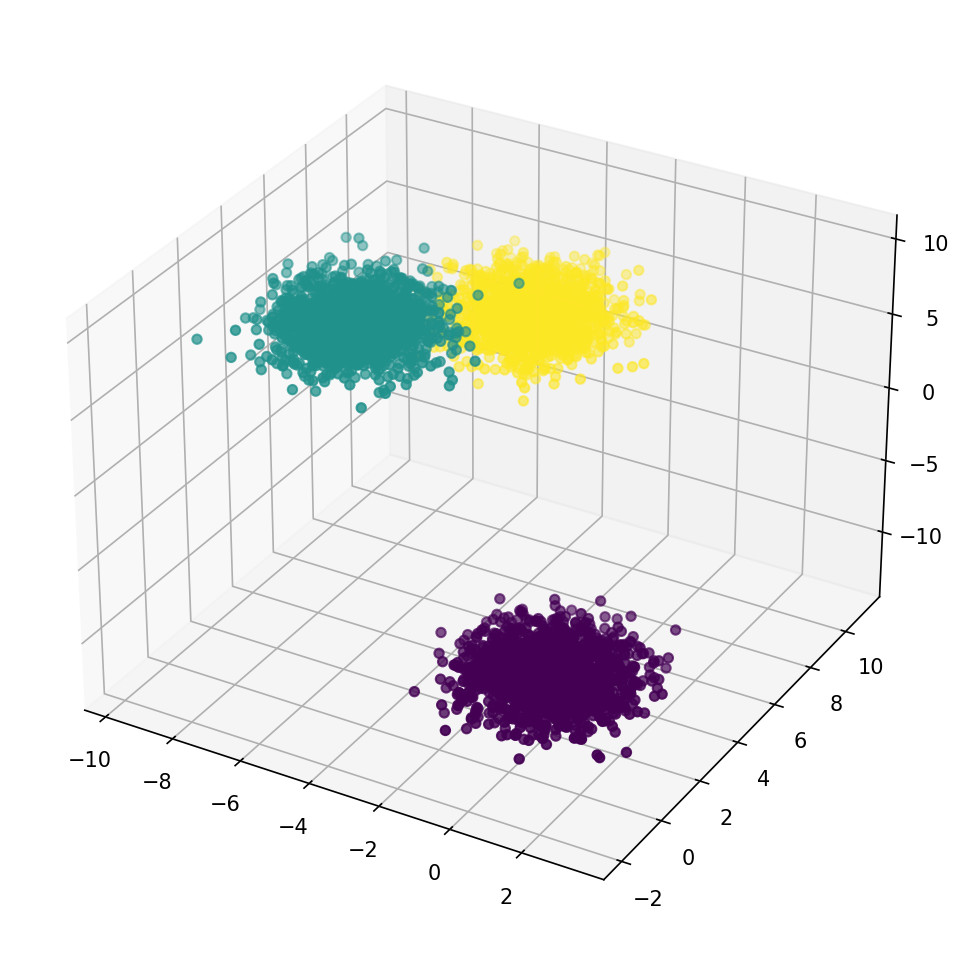

In [6]:
%matplotlib inline
plot_features_3D(X, y)

In [43]:
from sklearn.mixture import BayesianGaussianMixture

UPPERBOUND = 10
bayesian_mixture  = BayesianGaussianMixture(n_components=UPPERBOUND, n_init=10, max_iter=1000, random_state=101, weight_concentration_prior=0.001)


In [44]:
bayesian_mixture.fit(X)

BayesianGaussianMixture(max_iter=1000, n_components=10, n_init=10,
                        random_state=101, weight_concentration_prior=0.001)

<Axes: >

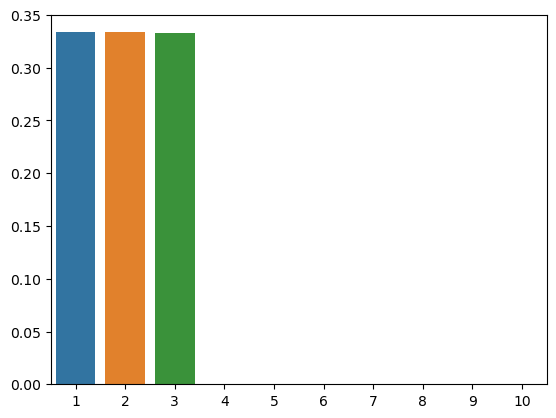

In [46]:
sns.barplot(x=np.arange(1,len(bayesian_mixture.weights_)+1), y=bayesian_mixture.weights_)

In [47]:
predictons = bayesian_mixture.predict(X)


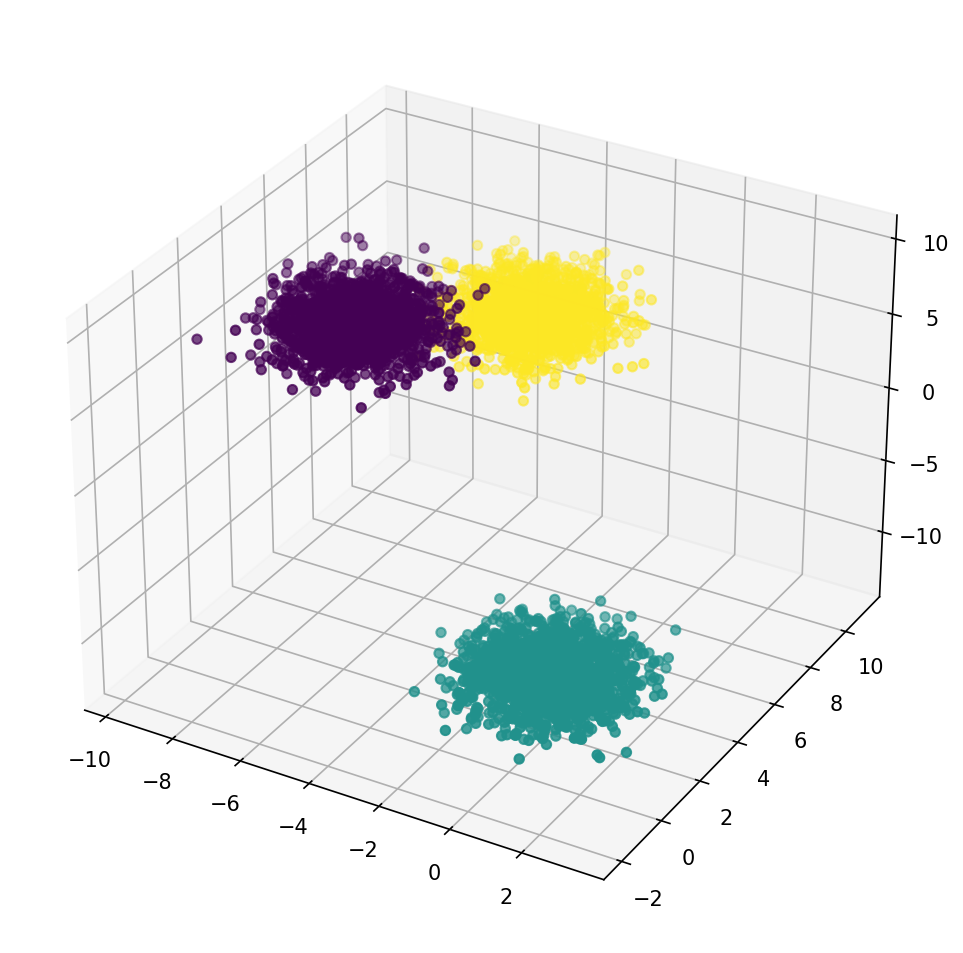

In [50]:
plot_features_3D(X, predictons)

## What about moons dataset

In [51]:
from sklearn.datasets import make_moons


X_m, y_m = make_moons(n_samples=1000, random_state=101, noise=0.08)

<Axes: >

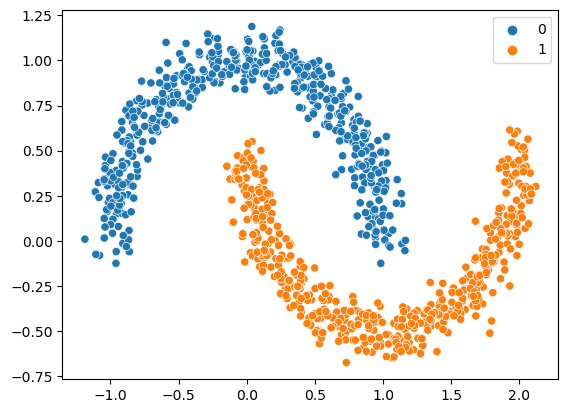

In [53]:
sns.scatterplot(x=X_m[:,0], y=X_m[:,1], hue=y_m)

In [76]:
bayesian_mixture_moon = BayesianGaussianMixture(n_components=15, max_iter=10**6 , n_init=2, weight_concentration_prior=0.01)

In [77]:
bayesian_mixture_moon.fit(X_m)

BayesianGaussianMixture(max_iter=1000000, n_components=15, n_init=2,
                        weight_concentration_prior=0.01)

<Axes: >

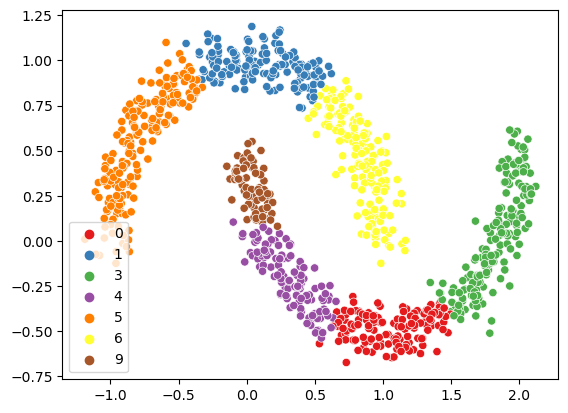

In [78]:
sns.scatterplot(x=X_m[:,0], y=X_m[:,1], hue=bayesian_mixture_moon.predict(X_m), palette='Set1')

<Axes: >

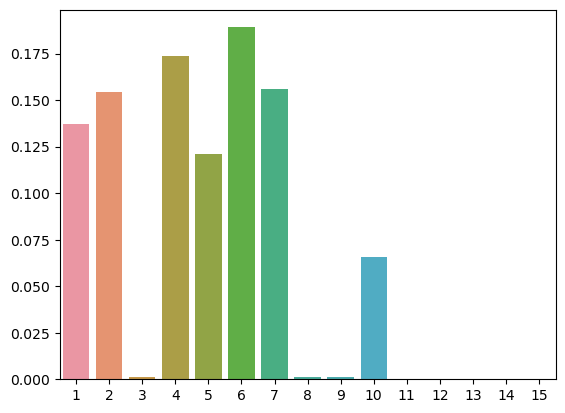

In [79]:
sns.barplot(x=np.arange(1,len(bayesian_mixture_moon.weights_)+1), y=bayesian_mixture_moon.weights_)

This failed to identified the moon cluster! It is suited for ellipsoidal clusters